<a href="https://colab.research.google.com/github/NEERAJSHARMABSDU/neeraj/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning and Applications : Joint Faculty Development Programme
# May 27 -31, 2019 

**Participating Academies : IIT Roorkee ,  MNIT Jaipur, NIT Patna, PDPM IIITDM Jabalpur  **

**Prinicipal Coordinating Academies : IIT Roorkee and PDPM IIITDM Jabalpur**

# Tutorial 4: Introduction to Autoencoders
** In this tutorial, we provide you a brief introduction to Autoencoders.**


Autoencoders is an unsupervised learning technique, which does not require output labels with the data. Autoencoders are same as dimension reduction methods such as Principal Component Analysis(PCA). Autoencoders are based on the concept of data encoding and decoding. The ultimate objective of Autoencoder us to minimize the recosntruction error.

There are variety of autoencoders, such as the convolutional autoencoder, denoising autoencoder, variational autoencoder and sparse autoencoder. We are going to implement convolutional autoencoder.

### Importing the required libraries

In [1]:
from keras.layers import Input, Dense
from keras.models import Model


Using TensorFlow backend.


### Model Building 

In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
ecoded = Dense(16, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(16, activation='sigmoid')(encoded)
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [0]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


### Model Configuration

In [0]:
autoencoder.compile(optimizer='adadelta', loss='mse')

### Data Loading and Preprocessing

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Training the model

In [8]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1292 - val_loss: 0.0722
Epoch 2/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.0705 - val_loss: 0.0693
Epoch 3/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.0682 - val_loss: 0.0671
Epoch 4/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.0657 - val_loss: 0.0642
Epoch 5/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.0627 - val_loss: 0.0609
Epoch 6/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.0595 - val_loss: 0.0577
Epoch 7/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.0563 - val_loss: 0.0545
Epoch 8/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.0533 - val_loss: 0.0514
Epoch 9/50
60000/60000 [==============================] - 2s 2

### Predicting the encoder output by providing input dataset  and decoder output by providing encoded images as input

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

### Showing the results on test dataset

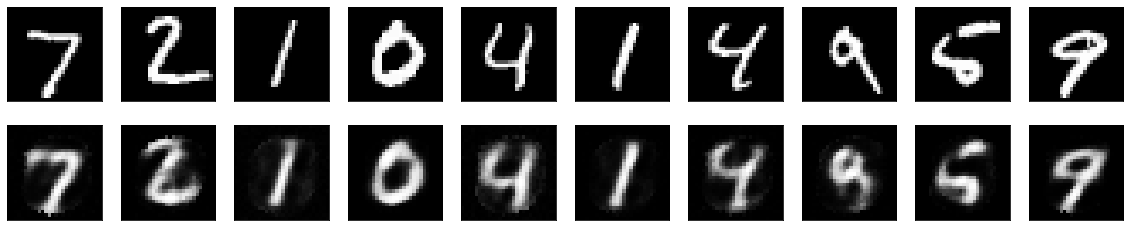

In [10]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Code Source : https://blog.keras.io/building-autoencoders-in-keras.html

In [11]:
Tutorial by Poornima Singh Thakur, PhD student, IIITDM Jabalpur

SyntaxError: ignored